In [1]:
# webstie https://nucleisegmentationbenchmark.weebly.com
# paper   https://drive.google.com/file/d/0ByERBiBsEbuTOEJISEpwSkR0SlE/view
import os
import re
import PIL
import time
import random
import itertools
import collections
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from xml.dom import minidom
from PIL import Image, ImageTk
from skimage.io import imread, imshow

TRAIN_PATH = '../orig_data/Tissue images/'
#XML_PATH   = '../orig_data/Annotations/'
XML_PATH   = '../orig_data/anno_test/'

MASK_PATH  = '../orig_data/mask_images/'  # manual create
train_ids = next(os.walk(TRAIN_PATH))[2]
xml_ids = next(os.walk(XML_PATH))[2]
print('train_ids = ' + str(len(train_ids)) + '\nlen(xml_ids) = ' + str(len(xml_ids)))
IMG_HEIGHT = 1000
IMG_WIDTH = 1000
IMG_CHANNELS = 1

kernel = np.ones((5,5),np.uint8)
mask_dict = {}
if not os.path.isdir(MASK_PATH):
    os.mkdir(MASK_PATH) 
    
img_filenames = [TRAIN_PATH + f for f in train_ids]
xml_filenames = [XML_PATH + f for f in xml_ids]
xml_filenames[0]    

train_ids = 30
len(xml_ids) = 1


'../orig_data/anno_test/alvin.xml'

In [2]:
def check_valid_xy(y, x):
    if x >= IMG_WIDTH: x = IMG_WIDTH-1
    if y >= IMG_HEIGHT: y = IMG_HEIGHT-1                
    if x <= 0: x = 0
    if y <= 0: y = 0
    return y,x

In [3]:
def generate_miss_node(y, x, py, px):
    dist_x = int(x) - px
    dist_y = int(y) - py
    miss_node = []
    if max(abs(dist_y),abs(dist_x)) >= 2 and py != IMG_HEIGHT and px != IMG_WIDTH:
        #print('------------------------------------------------------------')
        #print('x =>' + str(x) + '\ty => ' + str(y) )
        #print('px =>' + str(px) + '\tpy => ' + str(py) )
        a = int(x); b = px
        newx = list(map(int,np.linspace(a,b, abs(b-a)+1).tolist()))
        #print('newx => ' + str(newx))
        if len(newx) >= 2: newx.pop(-1)
        if len(newx) >= 2: newx.pop(0)
        a = int(y); b = py
        newy = list(map(int,np.linspace(a,b, abs(b-a)+1).tolist()))
        #print('newy => ' + str(newy))
        if len(newy) >= 2: newy.pop(-1)
        if len(newy) >= 2: newy.pop(0)
        miss_node = list(itertools.product(newy, newx))
    return miss_node

In [4]:
root = minidom.parse(xml_filenames[0])
Regions=root.getElementsByTagName('Region');

mask_contour = np.zeros((IMG_HEIGHT, IMG_WIDTH), dtype=np.uint8)
mask_solid   = np.zeros((IMG_HEIGHT, IMG_WIDTH), dtype=np.uint8)
for region_idx in range(len(Regions)):
    Region=Regions.item(region_idx)
    verticies=Region.getElementsByTagName('Vertex');
    Region_ID = Region.getAttribute('Id')
    single_mask = np.zeros((IMG_HEIGHT, IMG_WIDTH), dtype=np.uint8)    
    vertix_list = []
    print('region_idx =' + str(region_idx))
    for vertexi in range(len(verticies)):
        x=int(float(verticies.item(vertexi).getAttribute('X')))
        y=int(float(verticies.item(vertexi).getAttribute('Y')))

        #vertix_list = []
        px   = IMG_WIDTH
        py   = IMG_HEIGHT  
        for vertexi in range(len(verticies)):
            x=int(float(verticies.item(vertexi).getAttribute('X')))
            y=int(float(verticies.item(vertexi).getAttribute('Y')))
            y, x = check_valid_xy(y, x)
            print('y= '+str(y)+'\tx= '+str(x))
            miss_node = generate_miss_node(y, x, py, px)
            if miss_node != []:
                #print(miss_node)
                vertix_list.extend(miss_node)
                #for node_y, node_x in miss_node:
                #    mask_contour[node_y,node_x] = 255 
                #    single_mask[node_y,node_x] = 255 # signal mask
            px = x
            py = y
            # fill mask contour
            #mask_contour[y, x] = 255 # all for one mask   
            #single_mask[y, x] = 255 # signal mask
            vertix_list.append([y, x]) 
            
                    
        vertix_list.append([int(y), int(x)])
        previous_x = int(x)
        previous_y = int(y)
    miss_node = generate_miss_node(vertix_list[0][0], vertix_list[0][1], vertix_list[-1][0], vertix_list[-1][1])
    print('vertix_list[0][0], vertix_list[0][1]= '+str(vertix_list[0][0])+'\t= '+ str(vertix_list[0][1]))
    print('vertix_list[-1][0], vertix_list[-1][1]= '+str(vertix_list[-1][0])+'\t= '+ str(vertix_list[-1][1]))
    print('miss_node => ' + str(miss_node))
    if miss_node != []:
        #print(miss_node)
        vertix_list.extend(miss_node)


region_idx =0
y= 972	x= 965
y= 972	x= 964
y= 971	x= 960
y= 970	x= 956
y= 970	x= 953
y= 970	x= 950
y= 965	x= 949
y= 964	x= 949
y= 963	x= 949
y= 961	x= 949
y= 960	x= 949
y= 959	x= 949
y= 957	x= 949
y= 957	x= 950
y= 956	x= 950
y= 955	x= 953
y= 953	x= 957
y= 953	x= 960
y= 952	x= 961
y= 951	x= 961
y= 949	x= 961
y= 949	x= 964
y= 949	x= 965
y= 949	x= 967
y= 949	x= 968
y= 949	x= 969
y= 951	x= 971
y= 953	x= 972
y= 956	x= 972
y= 959	x= 972
y= 960	x= 972
y= 961	x= 972
y= 964	x= 972
y= 967	x= 972
y= 970	x= 972
y= 971	x= 972
y= 972	x= 972
y= 974	x= 972
y= 974	x= 971
y= 974	x= 969
y= 974	x= 967
y= 972	x= 965
y= 972	x= 964
y= 971	x= 960
y= 970	x= 956
y= 970	x= 953
y= 970	x= 950
y= 965	x= 949
y= 964	x= 949
y= 963	x= 949
y= 961	x= 949
y= 960	x= 949
y= 959	x= 949
y= 957	x= 949
y= 957	x= 950
y= 956	x= 950
y= 955	x= 953
y= 953	x= 957
y= 953	x= 960
y= 952	x= 961
y= 951	x= 961
y= 949	x= 961
y= 949	x= 964
y= 949	x= 965
y= 949	x= 967
y= 949	x= 968
y= 949	x= 969
y= 951	x= 971
y= 953	x= 972
y= 956	x= 972
y= 959

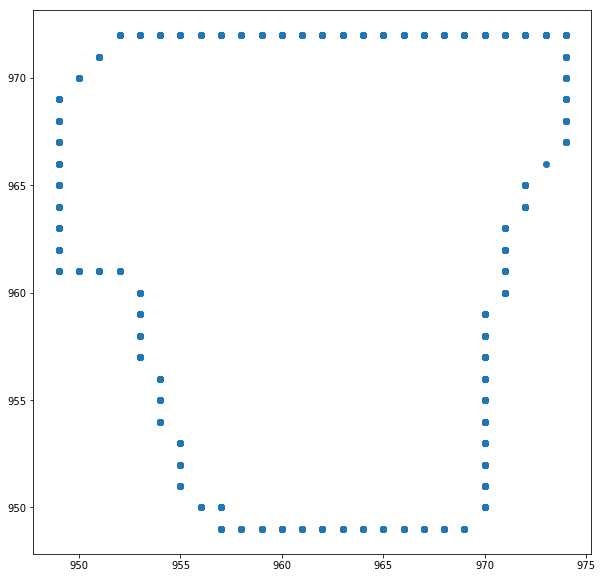

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(1,1,1)
y_list = [vertix_list[i][0] for i in range(len(vertix_list))]
x_list = [vertix_list[i][1] for i in range(len(vertix_list))]
plt.scatter(y_list,x_list)
plt.show()